# Red convolucional

In [101]:
import os
import random
import numpy as np
import tensorflow as tf

# De esta manera se ajusta la semilla para que sea replicable
seed_value= 448

os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [102]:
from keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np


(train_X, train_Y),(test_X, test_Y) = mnist.load_data()

np.random.seed(448)
tf.random.set_seed(221)

clases = 10
dimensiones = (28, 28, 1)

train_X = train_X.astype("float32") / 255
test_X = test_X.astype("float32") / 255

train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

# convert class vectors to binary class matrices
train_Y = to_categorical(train_Y, clases)
test_Y = to_categorical(test_Y, clases)

# red

In [103]:
# capas de la red
capas = [
    keras.Input(shape=dimensiones),
    layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(units=200, activation="relu"),
    layers.Dense(units=clases, activation="softmax"),
]

miRed = keras.Sequential(capas, name="miRed")

# config

In [104]:
batch_size = 512
epochs = 10

miRed.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

result = miRed.fit(
    train_X,
    train_Y,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1
)


Epoch 1/10
106/106 [==============================] - 6s 52ms/step - loss: 0.4664 - accuracy: 0.8628 - val_loss: 0.0908 - val_accuracy: 0.9762
Epoch 2/10
106/106 [==============================] - 5s 51ms/step - loss: 0.1150 - accuracy: 0.9642 - val_loss: 0.0597 - val_accuracy: 0.9820
Epoch 3/10
106/106 [==============================] - 5s 51ms/step - loss: 0.0826 - accuracy: 0.9746 - val_loss: 0.0487 - val_accuracy: 0.9865
Epoch 4/10
106/106 [==============================] - 5s 50ms/step - loss: 0.0678 - accuracy: 0.9795 - val_loss: 0.0448 - val_accuracy: 0.9868
Epoch 5/10
106/106 [==============================] - 5s 49ms/step - loss: 0.0586 - accuracy: 0.9817 - val_loss: 0.0373 - val_accuracy: 0.9900
Epoch 6/10
106/106 [==============================] - 5s 50ms/step - loss: 0.0496 - accuracy: 0.9846 - val_loss: 0.0365 - val_accuracy: 0.9892
Epoch 7/10
106/106 [==============================] - 5s 50ms/step - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.0313 - val_accuracy: 0.9917

# results < 1 min

In [105]:
score2 = miRed.evaluate(test_X, test_Y, verbose=10)
print("Test loss:", score2[0])
print("Test accuracy:", score2[1])
print("Test error rate:", (1 - score2[1])*100)

Test loss: 0.02243364229798317
Test accuracy: 0.9919999837875366
Test error rate: 0.8000016212463379


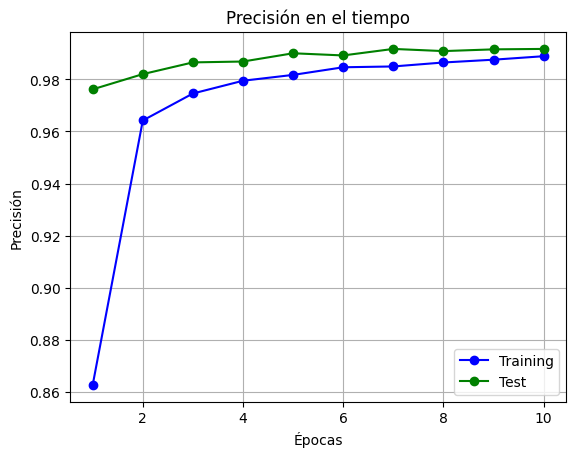

In [106]:
import matplotlib.pyplot as plt

# Obtener la precisión y pérdida en cada época
train_acc = result.history['accuracy']
val_acc = result.history['val_accuracy']

# Crear gráfica de la precisión
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training', marker='o', linestyle='-', color='b')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Test', marker='o', linestyle='-', color='g')
plt.title('Precisión en el tiempo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

### Imprimimos los resultados

In [107]:
# prediccion = miRed.predict(test_X)
# etiquetas = prediccion.argmax(axis=1)

# result = ""

# for v in etiquetas:
#     result += str(v)

# with open('results\convo1.txt', 'w', encoding='utf-8') as f:
#     f.write(result)